# Math 725 Advanced Linear Algebra
## Harmonically Generated Polytopes


### Brent A. Thorne

brentathorne@gmail.com

##### Use homogenous transformations to generate polytopes.

In [1]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
from sympy import I, pi, cos, sqrt, exp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [2]:
def plain_plot(x,y):
    plt.clf()
    title='3D object projected into 2D'
    lim = 3
    plt.title(f"{title}"); 
    plt.xlabel("X axis"); 
    plt.ylabel("Y axis")
    plt.scatter(x,y, color ="red")
    plt.plot(x,y, color ="blue")
    plt.xlim(-lim,lim); plt.ylim(-lim,lim)
    plt.grid(); plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(0, color='black', linestyle='--')

In [3]:
def rot(thetaX,thetaY, thetaZ): 
    #rot X
    Tx = np.matrix([[1,0,0,0],\
            [0,np.cos(thetaX),-np.sin(thetaX),0],\
            [0,np.sin(thetaX),np.cos(thetaX),0],\
            [0,0,0,1]])
    #rot Y
    Ty = np.matrix([[np.cos(thetaY),0,np.sin(thetaY),0],\
            [0,1,0,0],\
            [-np.sin(thetaY),0,np.cos(thetaY),0],\
            [0,0,0,1]])

    #rot Z
    Tz = np.matrix([[np.cos(thetaZ),-np.sin(thetaZ),0,0],\
            [np.sin(thetaZ),np.cos(thetaZ),0,0],\
            [0,0,1,0],\
            [0,0,0,1]])
    return(Tz*Ty*Tx) # think about the order of operatons here, this seems natural

### Define a cube as vector of points

matrix([[ 1.25668466e+00,  9.80785280e-01,  7.04885901e-01,
          9.80785280e-01, -9.80785280e-01, -1.25668466e+00,
         -9.80785280e-01, -7.04885901e-01,  1.25668466e+00],
        [ 1.11022302e-16,  1.41421356e+00, -1.11022302e-16,
         -1.41421356e+00, -1.41421356e+00, -1.11022302e-16,
          1.41421356e+00,  1.11022302e-16,  1.11022302e-16],
        [ 1.19194952e+00, -1.95090322e-01, -1.58213017e+00,
         -1.95090322e-01,  1.95090322e-01, -1.19194952e+00,
          1.95090322e-01,  1.58213017e+00,  1.19194952e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

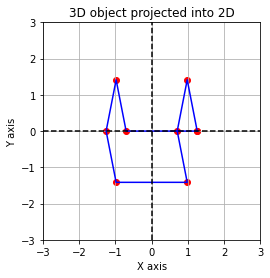

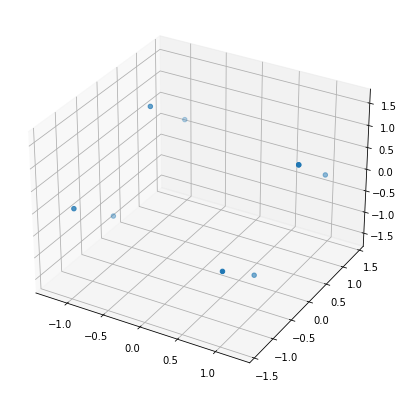

In [4]:
# Manually define a cube by the points on each face
D = np.matrix(([[1,-1,-1, 1,1,  1,-1,-1, 1,  1, 1,-1,-1, -1,-1, 1, 1],\
                [1, 1,-1,-1,1,  1, 1,-1,-1,  1, 1, 1, 1, -1,-1,-1,-1],\
                [1, 1, 1, 1,1, -1,-1,-1,-1, -1, 1, 1,-1, -1, 1, 1,-1],\
                [1, 1, 1, 1,1,  1, 1, 1, 1,  1, 1, 1, 1,  1, 1, 1, 1]]))

# Another manual way.
D = np.matrix([ \
               [1,1,1,1], \
               [1,1,-1,1], [1,-1,-1,1],[1,-1,1,1], \
               [-1,-1,1,1],[-1,-1,-1,1], [-1,1,-1,1],[-1,1,1,1],  [1,1,1,1]\
              ]).T

# Let's do a projection for the sake of visualization.
# Look Ma, I do Maths!
d = 10 # distance of projection
P = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,-1/d,1]])
P= np.eye(4)

# do a rotatation and projection
phi = 2*np.pi/8
T = rot(phi,phi/4,0)
M = P*(T*D)
H = M[3]
N = np.divide(M,H)[0:2] # normalize

# Display Object
x,=N[0].tolist()
y,=N[1].tolist()
plain_plot(x,y)

display(M)
x,=M[0].tolist(); y,=M[1].tolist(); z,=M[2].tolist();
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z);

### Let's go off the map a bit...
Consider sets for which no useful notion of addition exist, because that's where we are...

$S^2=\{(x,y,z)\in \Bbb{R}^3| x^2+y^2+z^2=1\}$

This is the 2D surface of a sphere. Clearly, no way to add North, $N=(0,0,1)$ to South, $S=(0,0,-1)$.  Also note that origin $(0,0,0)$ is not in $S^2$.

### Define our Cube as rotation around an axis.
Because it demonstrates why the cube points aren't a vector space, however the module of the points can be.

...this is sort of a wierd idea that we need a bit more theory to explain.  We are all strangers in a Strang land.

https://math.mit.edu/~gs/

matrix([[ 0.5,  0.5,  0.5,  0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5],
        [ 0.5,  0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5],
        [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5]])

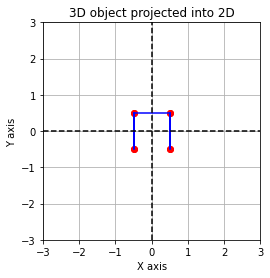

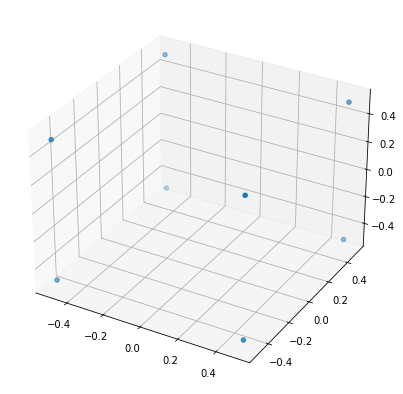

In [93]:
# Now let's define our object as a point cyclicly rotated
d = 1/2
D = np.matrix([d,d,d,d]).T
P = np.eye(4) # use Indentity Projection

n=8
M=D
for i in range(1,n//2): 
    phi = i* 2*np.pi/(n//2)
    T = rot(phi,0,0)   
    M = np.append(M, P*(T*D), axis=1)

for i in range(n//2): 
    phi = i* 2*np.pi/(n//2)
    T = rot(0,np.pi,0) * rot(phi,0,0)   
    M = np.append(M, P*(T*D), axis=1)

x,=M[0].tolist(); y,=M[1].tolist();
plain_plot(x,y)

#display(np.shape(M))
display(M)
x,=M[0].tolist(); y,=M[1].tolist(); z,=M[2].tolist();
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z);

### Publications on Harmonic Polynomials

Paul Erdos:
https://jmahaffy.sdsu.edu/courses/s12/math342B/lectures/sources/elliptic_spiral_Earth.pdf

Coding of circular varibles:
https://www.sciencedirect.com/science/article/pii/S0042698909005550

Simular to electron packing around an atom...

Consider Harmonic polynomials:  https://en.wikipedia.org/wiki/Spherical_harmonics 

$A_l= \{ \text{harmonic polynomials } \Bbb{R}^3\to \Bbb{C} \text{ that are homogeneous of degree } l \} $


### Legendre polynomials
This one we know from classical field theory...

$p(\theta,\phi)=c{(\sqrt{1-cos^2(\theta)})}^\ell e^{i\ell \phi}$

We come back to this later, but this provides a path forward towards an analytic solution for placing equally distanced points on the surface of a sphere... 

I think, maybe, honestly I don't know.  Obvious that we'll have two periods, one for the diagonals and one for the edges. 

In [7]:
def z_plot(z, c=None):
    plt.scatter(z.real, z.imag, c=c)
    z = np.append(z,z[0]) # close the shape
    plt.plot(z.real, z.imag, c=c)
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--') 

Matrix([[I, I*exp(I*pi/4), -1, I*exp(3*I*pi/4), -I, I*exp(-3*I*pi/4), 1, I*exp(-I*pi/4)]])

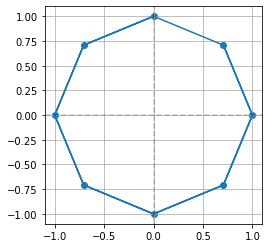

In [90]:
theta, phi, l = sym.symbols('theta phi l')
n=8
theta = 2*sym.pi/(n/2)
phi = 2*sym.pi/(n)
c= I
p=Matrix([c * sqrt(1-cos(theta)**2) **l * sym.exp(I*l*phi) for l in range(n)]).T

display(p) # nice! This ought to look familar from the polygon map exercise
z_plot(np.array(p.tolist()).astype(np.complex64))

### Haversine

$haversine(\theta)=sin^2\bigg(\frac{\theta}{2}\bigg)$

haversine of the central angle is...

$\bigg(\frac{d}{r}\bigg) = haversine(\phi_2-\phi_1)+cos(\phi_1)cos(\phi_2)haversine(\lambda_2-\lambda_1)$

... and now we see yet another way forward, but we'll ignore this for now.

### Define object as a point harmonically rotated in $S^2$.

This fun! ...thinking about the lenght of a line thru our points on the surface $S^2$

This is almost right!  We'll return to this later.

Ask Arek about a way to approach this analyically.

We know $S^2$ isn't a valid vector space however below we demonstrate that this harmonic approach is possible.

It's just a bit egged shaped...

matrix([[ 0.70710678,  1.        , -0.70710678, -1.        , -0.70710678,
         -1.        ,  0.70710678,  1.        ],
        [ 0.70710678, -0.70710678, -0.70710678,  0.70710678,  0.70710678,
         -0.70710678, -0.70710678,  0.70710678]])

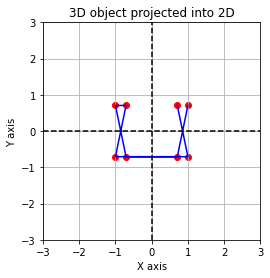

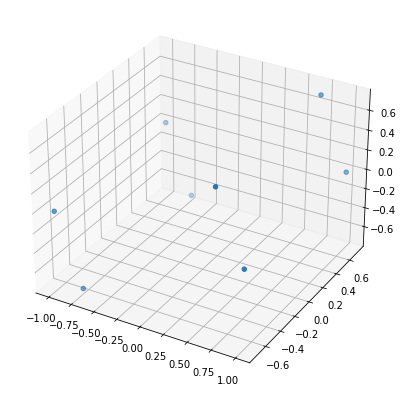

In [127]:
# Now let's define our object as a point harmonically rotated
# Okay these points aren't evely spaced, proof of concept
# Legendre provides a thoery and Haversine a test 
n=8; 
d= np.sqrt(2)/2
D = np.matrix([d,d,d,1]).T  
P = np.eye(4) # use Indentity Projection

#phi and rho step
phi_s = 4*np.pi/n;   # these ratio are only going to work for a cube
rho_s = 4*np.pi/(2*n)  

phi_s = np.pi/2
rho_s = np.pi/4

M = D # define our initial point
for i in range(1,n): 
    phi = i*phi_s
    rho = i*rho_s 
    T = rot(phi,rho,0) 
    M = np.append(M, P*(T*D), axis=1)

# normalize    
H = M[3]; N = np.divide(M,H)[0:2]; 
x,=N[0].tolist(); y,=N[1].tolist(); plain_plot(x,y)

x,=M[0].tolist(); y,=M[1].tolist(); z,=M[2].tolist();
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z);
N

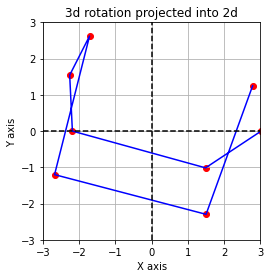

In [10]:
import matplotlib.animation as manimation

metadata = dict(title='Harmonic Shapes',
                artist='Brent A. Thorne',
                comment='Be excellent to each other!!')

FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()

# we're being a bit sloppy with our scope, but not I'm getting paid to do this
def frame_plot(x,y): 
    plt.clf()
    title='3d rotation projected into 2d'
    lim = 3
    plt.title(f"{title}"); 
    plt.xlabel("X axis"); 
    plt.ylabel("Y axis")
    plt.scatter(x,y, color ="red")
    plt.plot(x,y, color ="blue")
    plt.xlim(-lim,lim); plt.ylim(-lim,lim)
    plt.grid(); plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(0, color='black', linestyle='--')
    writer.grab_frame();

D=M #use our work from above
d = 10 # distance of projection
P = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,-1/d,1]])
      
#n = 1000; theta = np.linspace(0, 6*np.pi, n) 
n = 10; theta = np.linspace(0, np.pi/4, n);

# Update the frames for the movie
with writer.saving(fig, "Data/harmonica.mp4", 100):
    for i in theta:
        T = rot(i,i/2,0)
        M = P*(T*D)
        H = M[3]
        N = np.divide(M,H)[0:2]
        
        x,=N[0].tolist()
        y,=N[1].tolist()
        frame_plot(x,y);

### Check youself
See file: Data/harmonica.mp4

Note: Jupyter notebook will only checkpoint an embedded video the first time this markdown is generated.  

<video src="Data/harmonica.mp4"></video>

In [11]:
#...so it's better to display the video in HTML

from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="Data/harmonica.mp4" type="video/mp4">
</video></div>""")